In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import pandas as pd 
warnings.filterwarnings('ignore')

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')
plt.rc('font', family='serif')
plt.rc('font', size=15)

In [12]:
f = pd.read_csv("ZTF_0_500.csv")
g = pd.read_csv("ZTF_500_1000.csv")
h = pd.read_csv("ZTF_1000_1500.csv")

In [13]:
ID = f.drop_duplicates(subset=['ID'])
IDg = g.drop_duplicates(subset=['ID'])
IDh = h.drop_duplicates(subset=['ID'])

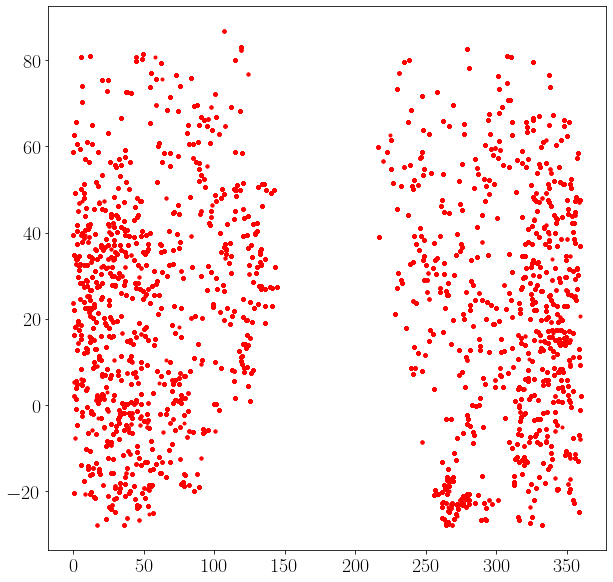

In [14]:
plt.figure(figsize=(10, 10))

for i in list(ID['ID']):
    F = f[f['ID']==i]
    plt.plot(F['ra'], F['dec'], 'r.')
for i in list(IDg['ID']):
    G = g[g['ID']==i]
    plt.plot(G['ra'], G['dec'], 'r.')
for i in list(IDh['ID']):
    H = h[h['ID']==i]
    plt.plot(H['ra'], H['dec'], 'r.')
    
plt.show()

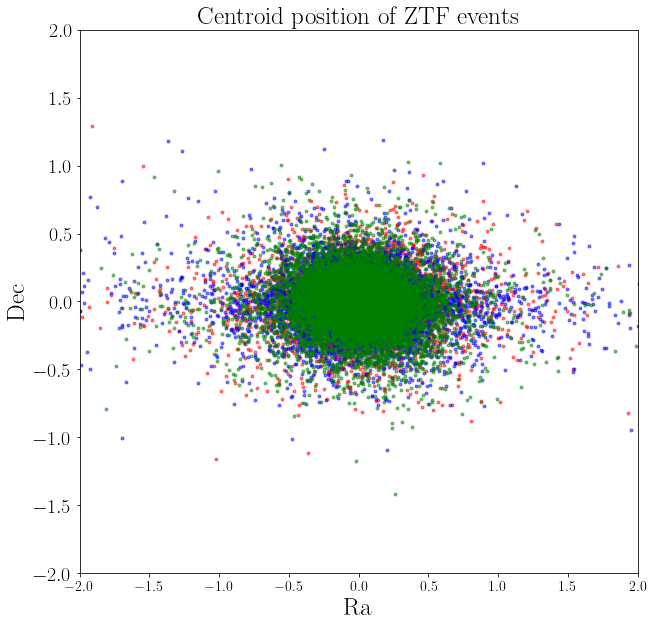

In [15]:
plt.figure(figsize=(10, 10))
for i in list(ID['ID']):
    F = f[f['ID']==i]
    plt.plot((F['ra']-np.mean(F['ra']))*3600, (F['dec']-np.mean(F['dec']))*3600, 'r.', alpha=0.5 )
for i in list(IDg['ID']):
    G = g[g['ID']==i]
    plt.plot((G['ra']-np.mean(G['ra']))*3600, (G['dec']-np.mean(G['dec']))*3600, 'b.', alpha=0.5  )
for i in list(IDh['ID']):
    H = h[h['ID']==i]
    plt.plot((H['ra']-np.mean(H['ra']))*3600, (H['dec']-np.mean(H['dec']))*3600, 'g.', alpha=0.5  )
    
plt.xlabel('Ra', fontsize = 25)
plt.ylabel('Dec', fontsize = 25)
plt.title('Centroid position of ZTF events', fontsize = 25)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
mpl.pyplot.xticks(fontsize=14);

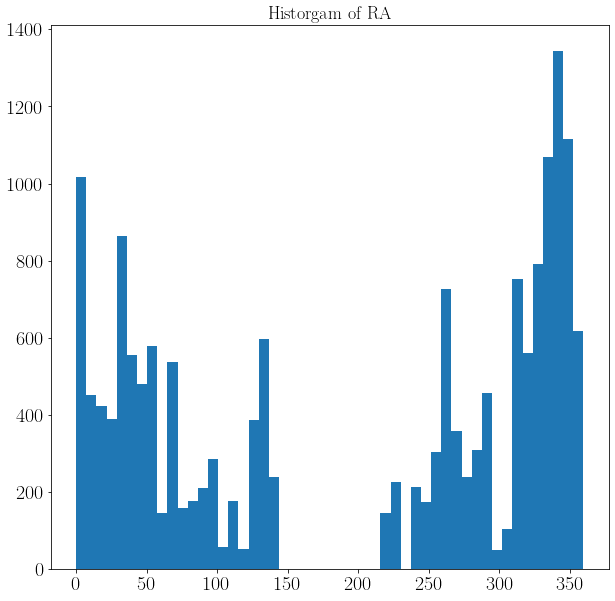

In [16]:
plt.figure(figsize=(10, 10))

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')
plt.rc('font', family='serif')
plt.rc('font', size=15)
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rc('axes', labelsize=20)

plt.hist(f['ra'], bins = 50);
#plt.hist(g['ra'], bins = 50);
#plt.hist(h['ra'], bins = 50);
plt.title('Historgam of RA');

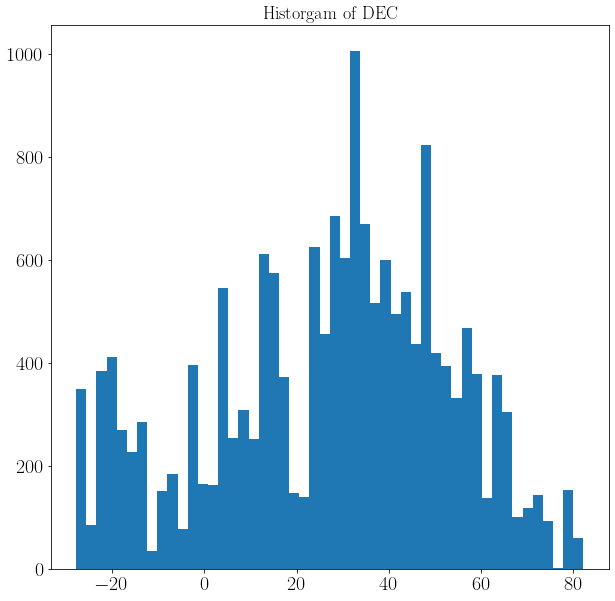

In [17]:
plt.figure(figsize=(10, 10))

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')
plt.rc('font', family='serif')
plt.rc('font', size=15)
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rc('axes', labelsize=20)

plt.hist(f['dec'], bins = 50);
#plt.hist(g['dec'], bins = 50);
#plt.hist(h['dec'], bins = 50);
plt.title('Historgam of DEC');